In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from keras.models import Sequential
from keras.layers import Conv1D, BatchNormalization, Dense, Flatten, Dropout, Input

In [4]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [25]:
data[["Time","Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [7]:
data.info() # no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

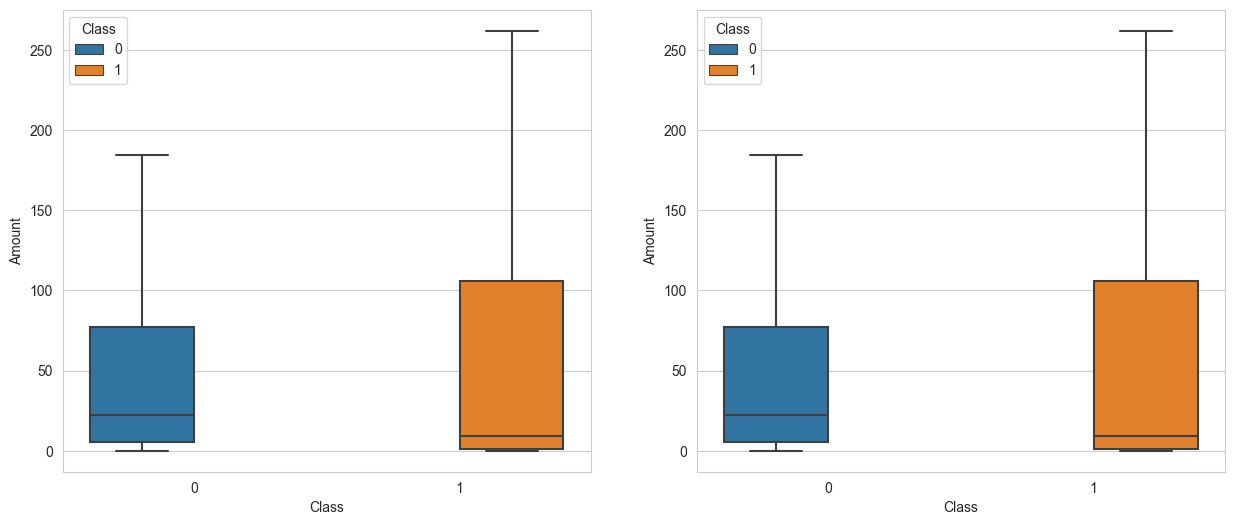

In [104]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
s = sns.boxplot(data=data, ax=ax1, x="Class", y="Amount", hue="Class", showfliers=False)
s = sns.boxplot(data=data, ax=ax2, x="Class", y="Amount", hue="Class", showfliers=False)
plt.show();

In [105]:
data[data.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [106]:
data[data.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
tmp = data.Class.value_counts()

In [16]:
print(f'No Fraud values: {round(tmp[0]/data.shape[0] * 100, 2)}%',
      f'\nFraud values: {round(tmp[1]/data.shape[0] * 100, 2)}%')

No Fraud values: 99.83% 
Fraud values: 0.17%


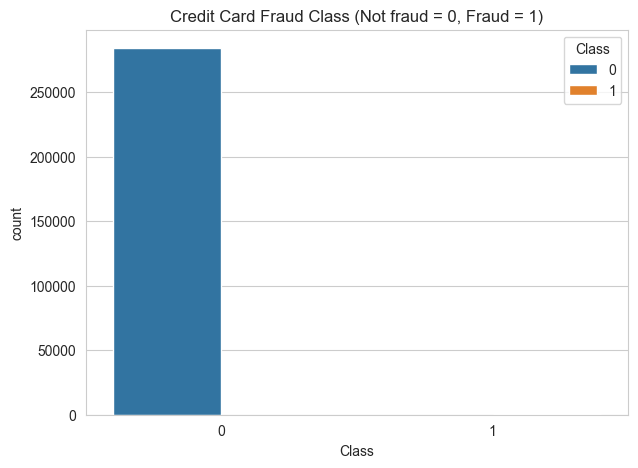

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(data, x='Class', hue='Class')
plt.title("Credit Card Fraud Class (Not fraud = 0, Fraud = 1)", fontsize=12)
plt.show()

In [57]:
data['Hour'] = data.Time.apply(lambda x: np.floor(x/3600)).astype(int)

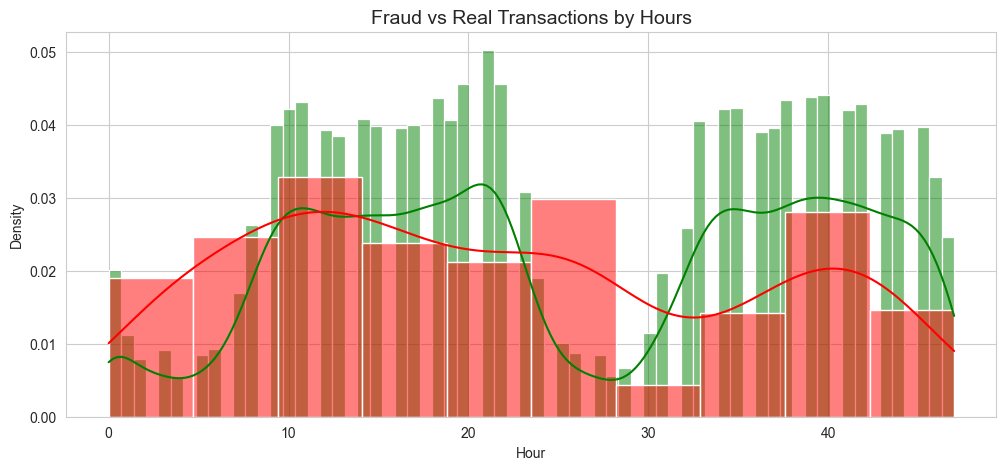

In [75]:
plt.figure(figsize=(12,5))
sns.histplot(data[data.Class==0]['Hour'], color='g', stat='density', kde=True)
sns.histplot(data[data.Class==1]['Hour'], color='r', stat='density', kde=True)
plt.title('Fraud vs Real Transactions by Hours', fontsize=14);

In [73]:
tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['count', 'min', 'max', 'sum', 'mean']).reset_index()
tmp.columns = ['Hour', 'Class', 'Transactions', 'Min', 'Max', 'Sum', 'Mean']

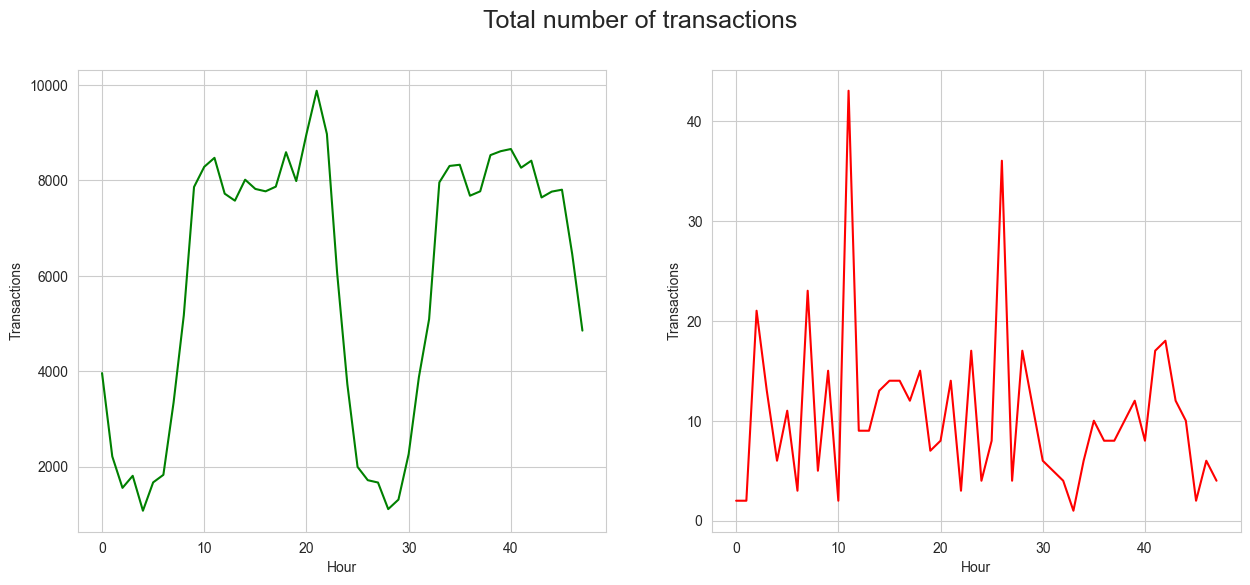

In [89]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(data=tmp[tmp.Class==0], x='Hour', y='Transactions', ax=ax1, color='green')
s = sns.lineplot(data=tmp[tmp.Class==1], x='Hour', y='Transactions', ax=ax2, color='red')
plt.suptitle("Total number of transactions", size=18)
plt.show();

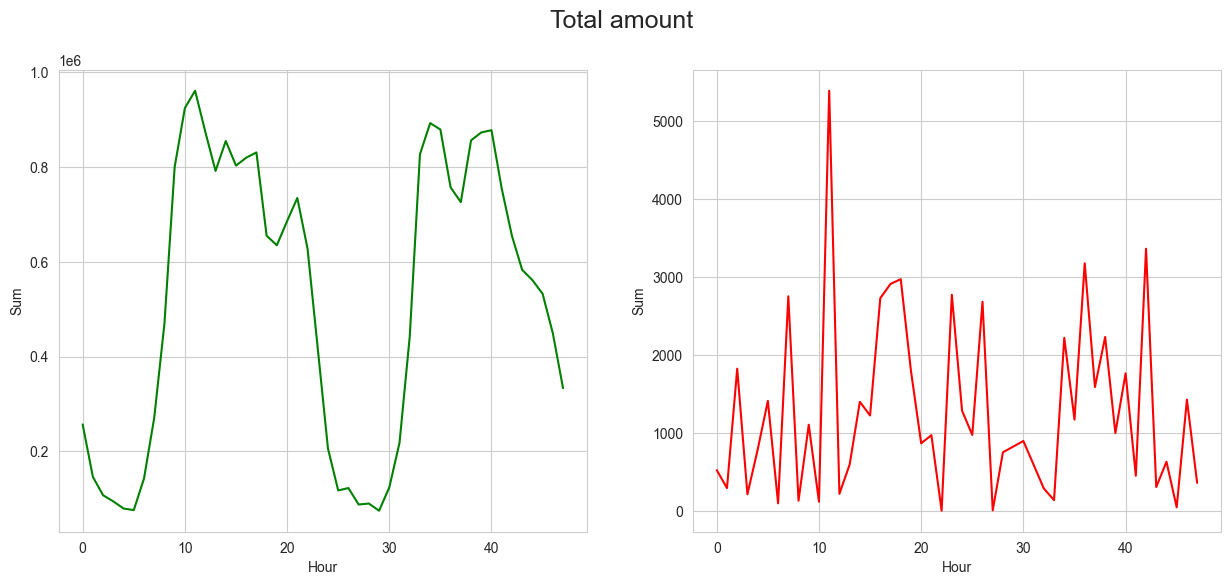

In [90]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(data=tmp[tmp.Class==0], x='Hour', y='Sum', ax=ax1, color='green')
s = sns.lineplot(data=tmp[tmp.Class==1], x='Hour', y='Sum', ax=ax2, color='red')
plt.suptitle("Total amount", size=18)
plt.show();

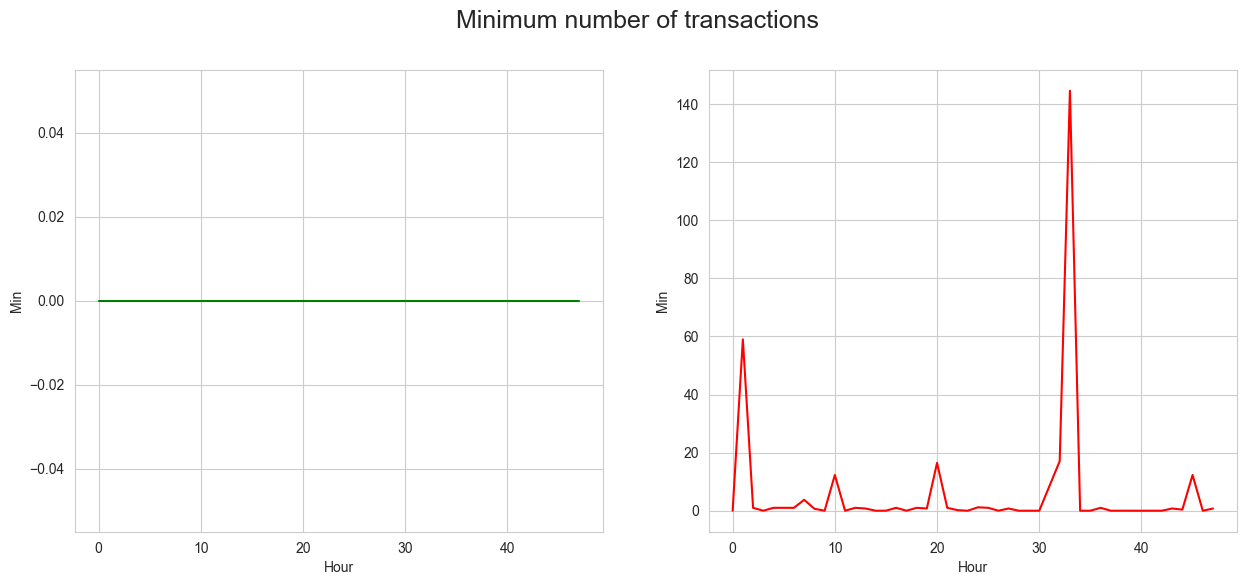

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(data=tmp[tmp.Class==0], x='Hour', y='Min', ax=ax1, color='green')
s = sns.lineplot(data=tmp[tmp.Class==1], x='Hour', y='Min', ax=ax2, color='red')
plt.suptitle("Minimum number of transactions", size=18)
plt.show();

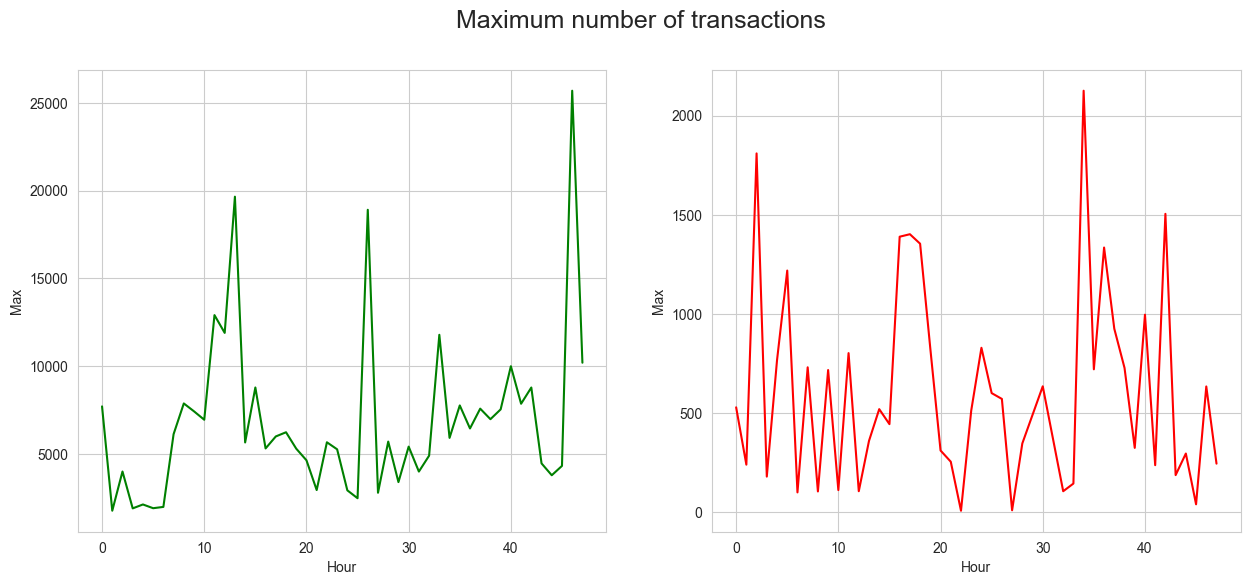

In [94]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(data=tmp[tmp.Class==0], x='Hour', y='Max', ax=ax1, color='green')
s = sns.lineplot(data=tmp[tmp.Class==1], x='Hour', y='Max', ax=ax2, color='red')
plt.suptitle("Maximum number of transactions", size=18)
plt.show();

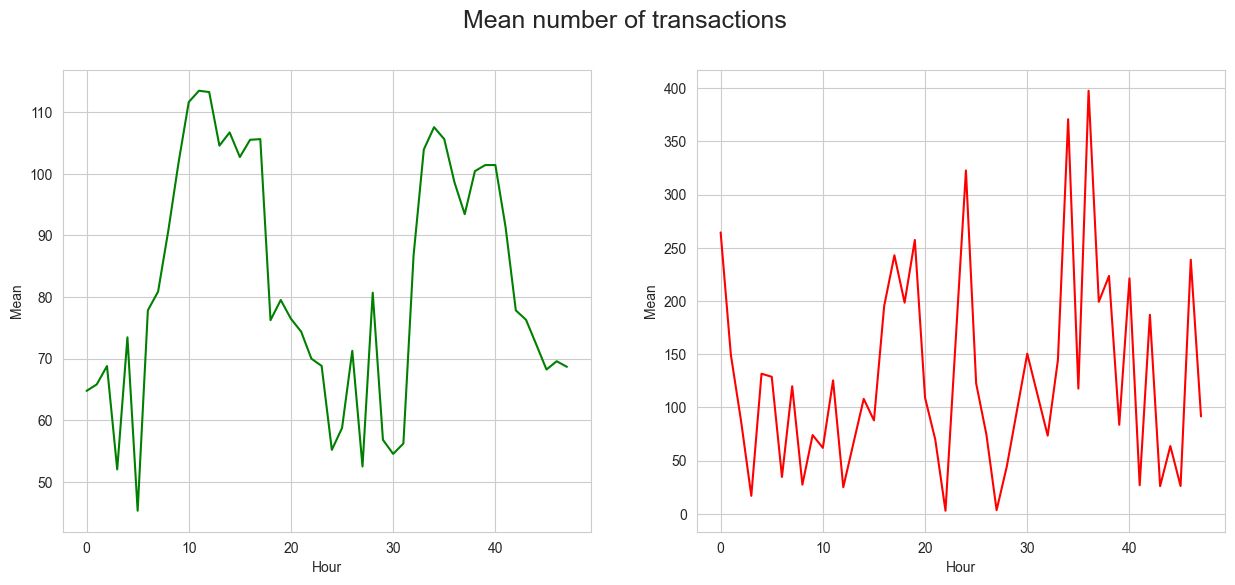

In [96]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))
s = sns.lineplot(data=tmp[tmp.Class==0], x='Hour', y='Mean', ax=ax1, color='green')
s = sns.lineplot(data=tmp[tmp.Class==1], x='Hour', y='Mean', ax=ax2, color='red')
plt.suptitle("Mean number of transactions", size=18)
plt.show();

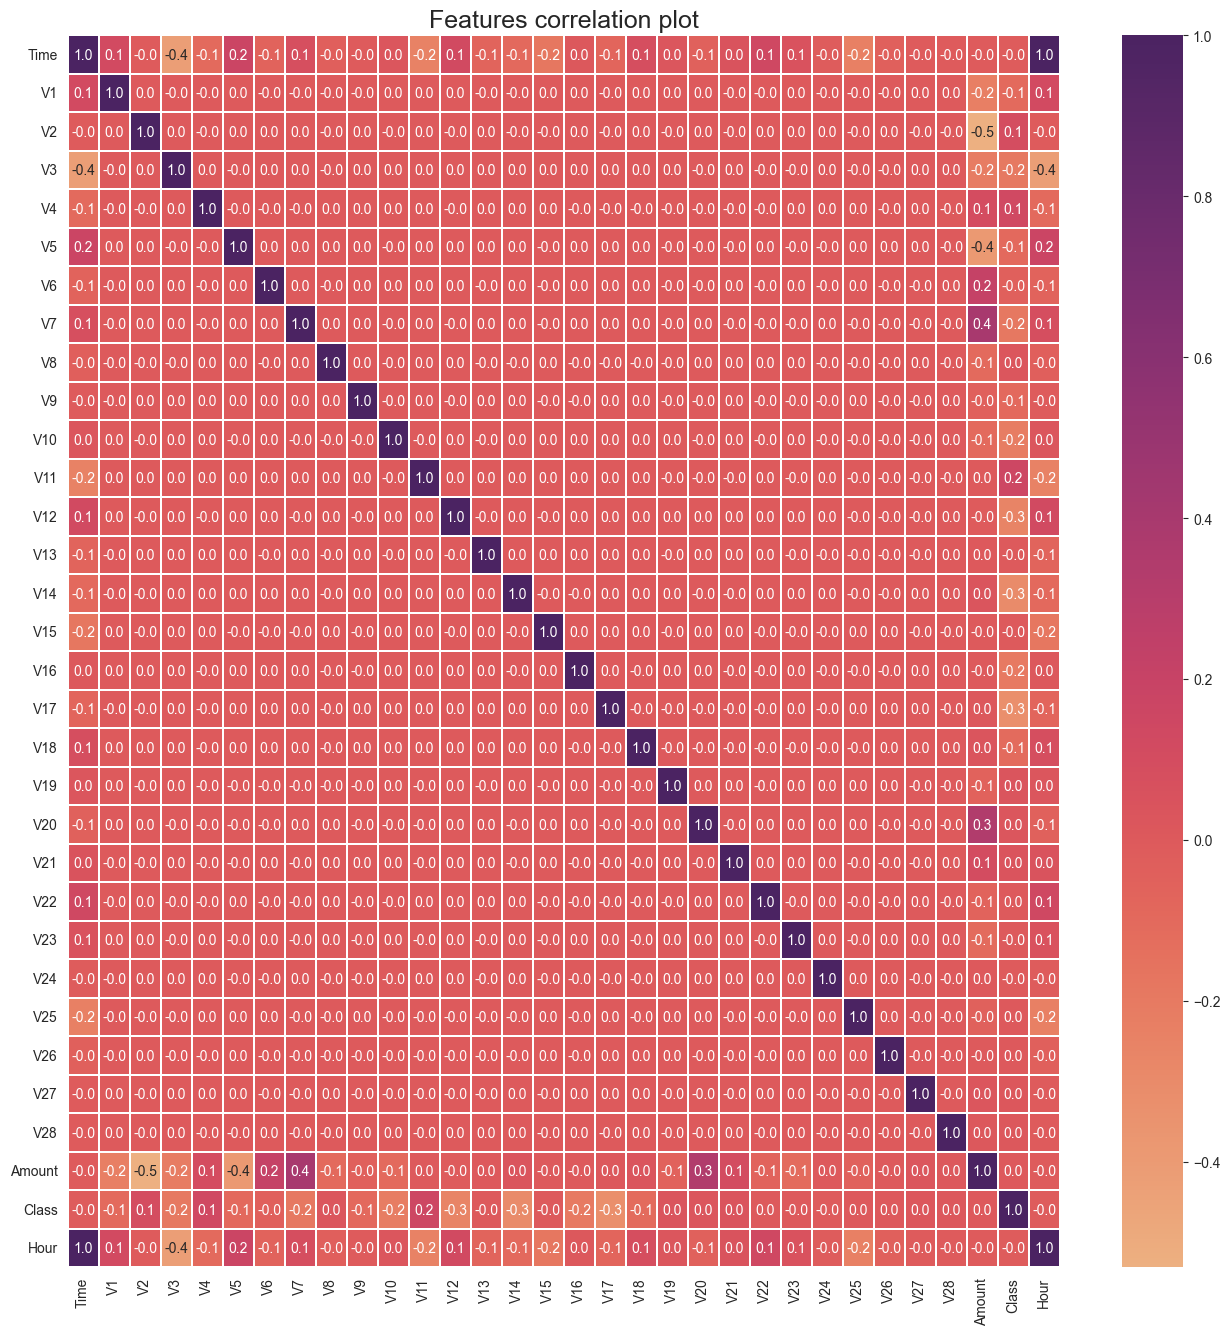

In [118]:
plt.figure(figsize = (16,16))
plt.title('Features correlation plot', size = 18)
corr = data.corr(method='pearson')
sns.heatmap(corr, linewidths=.1, cmap='flare', annot=True, fmt='.1f')
plt.show()

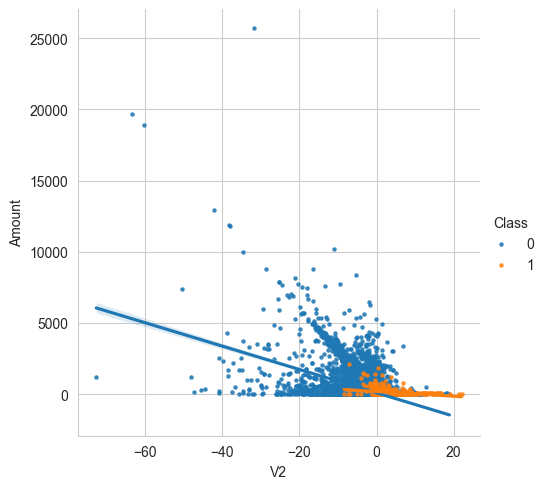

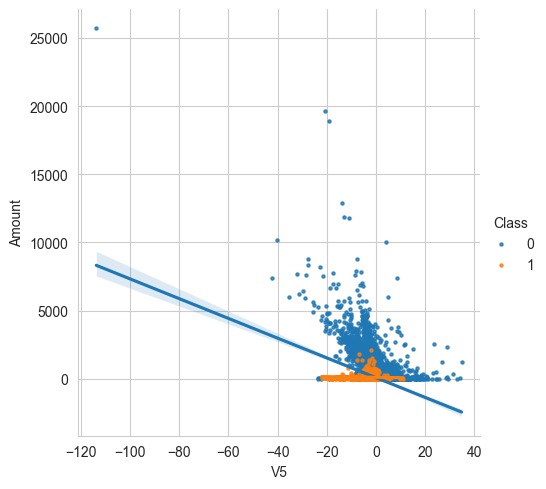

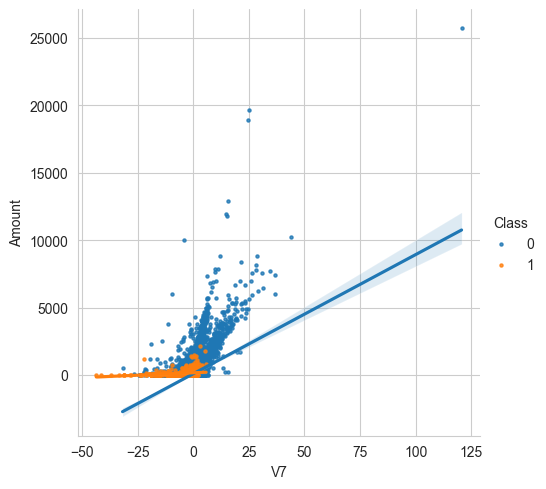

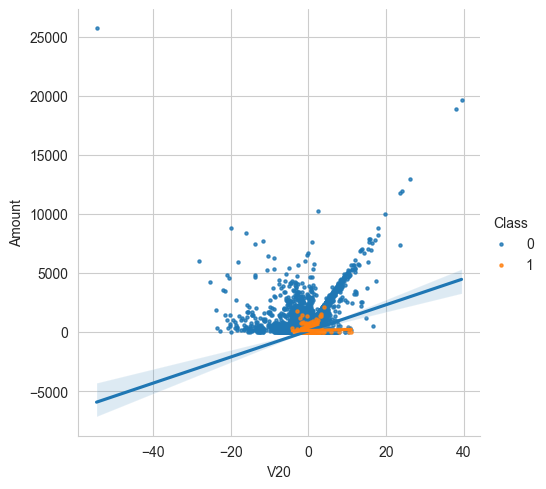

In [130]:
sns.lmplot(data=data, x='V2', y='Amount', hue='Class', fit_reg=True, scatter_kws={'s':5});
sns.lmplot(data=data, x='V5', y='Amount', hue='Class', fit_reg=True, scatter_kws={'s':5});
sns.lmplot(data=data, x='V7', y='Amount', hue='Class', fit_reg=True, scatter_kws={'s':5});
sns.lmplot(data=data, x='V20', y='Amount', hue='Class', fit_reg=True, scatter_kws={'s':5});

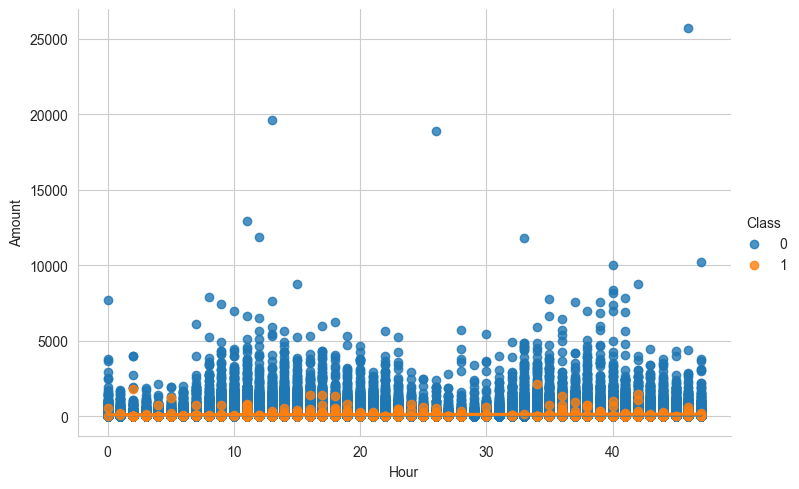

In [133]:
sns.lmplot(data=data, x="Hour", y="Amount", hue='Class', aspect=1.5);

C:\Users\trsgr\AppData\Local\Temp\ipykernel_10088\2037691584.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(grid[i])


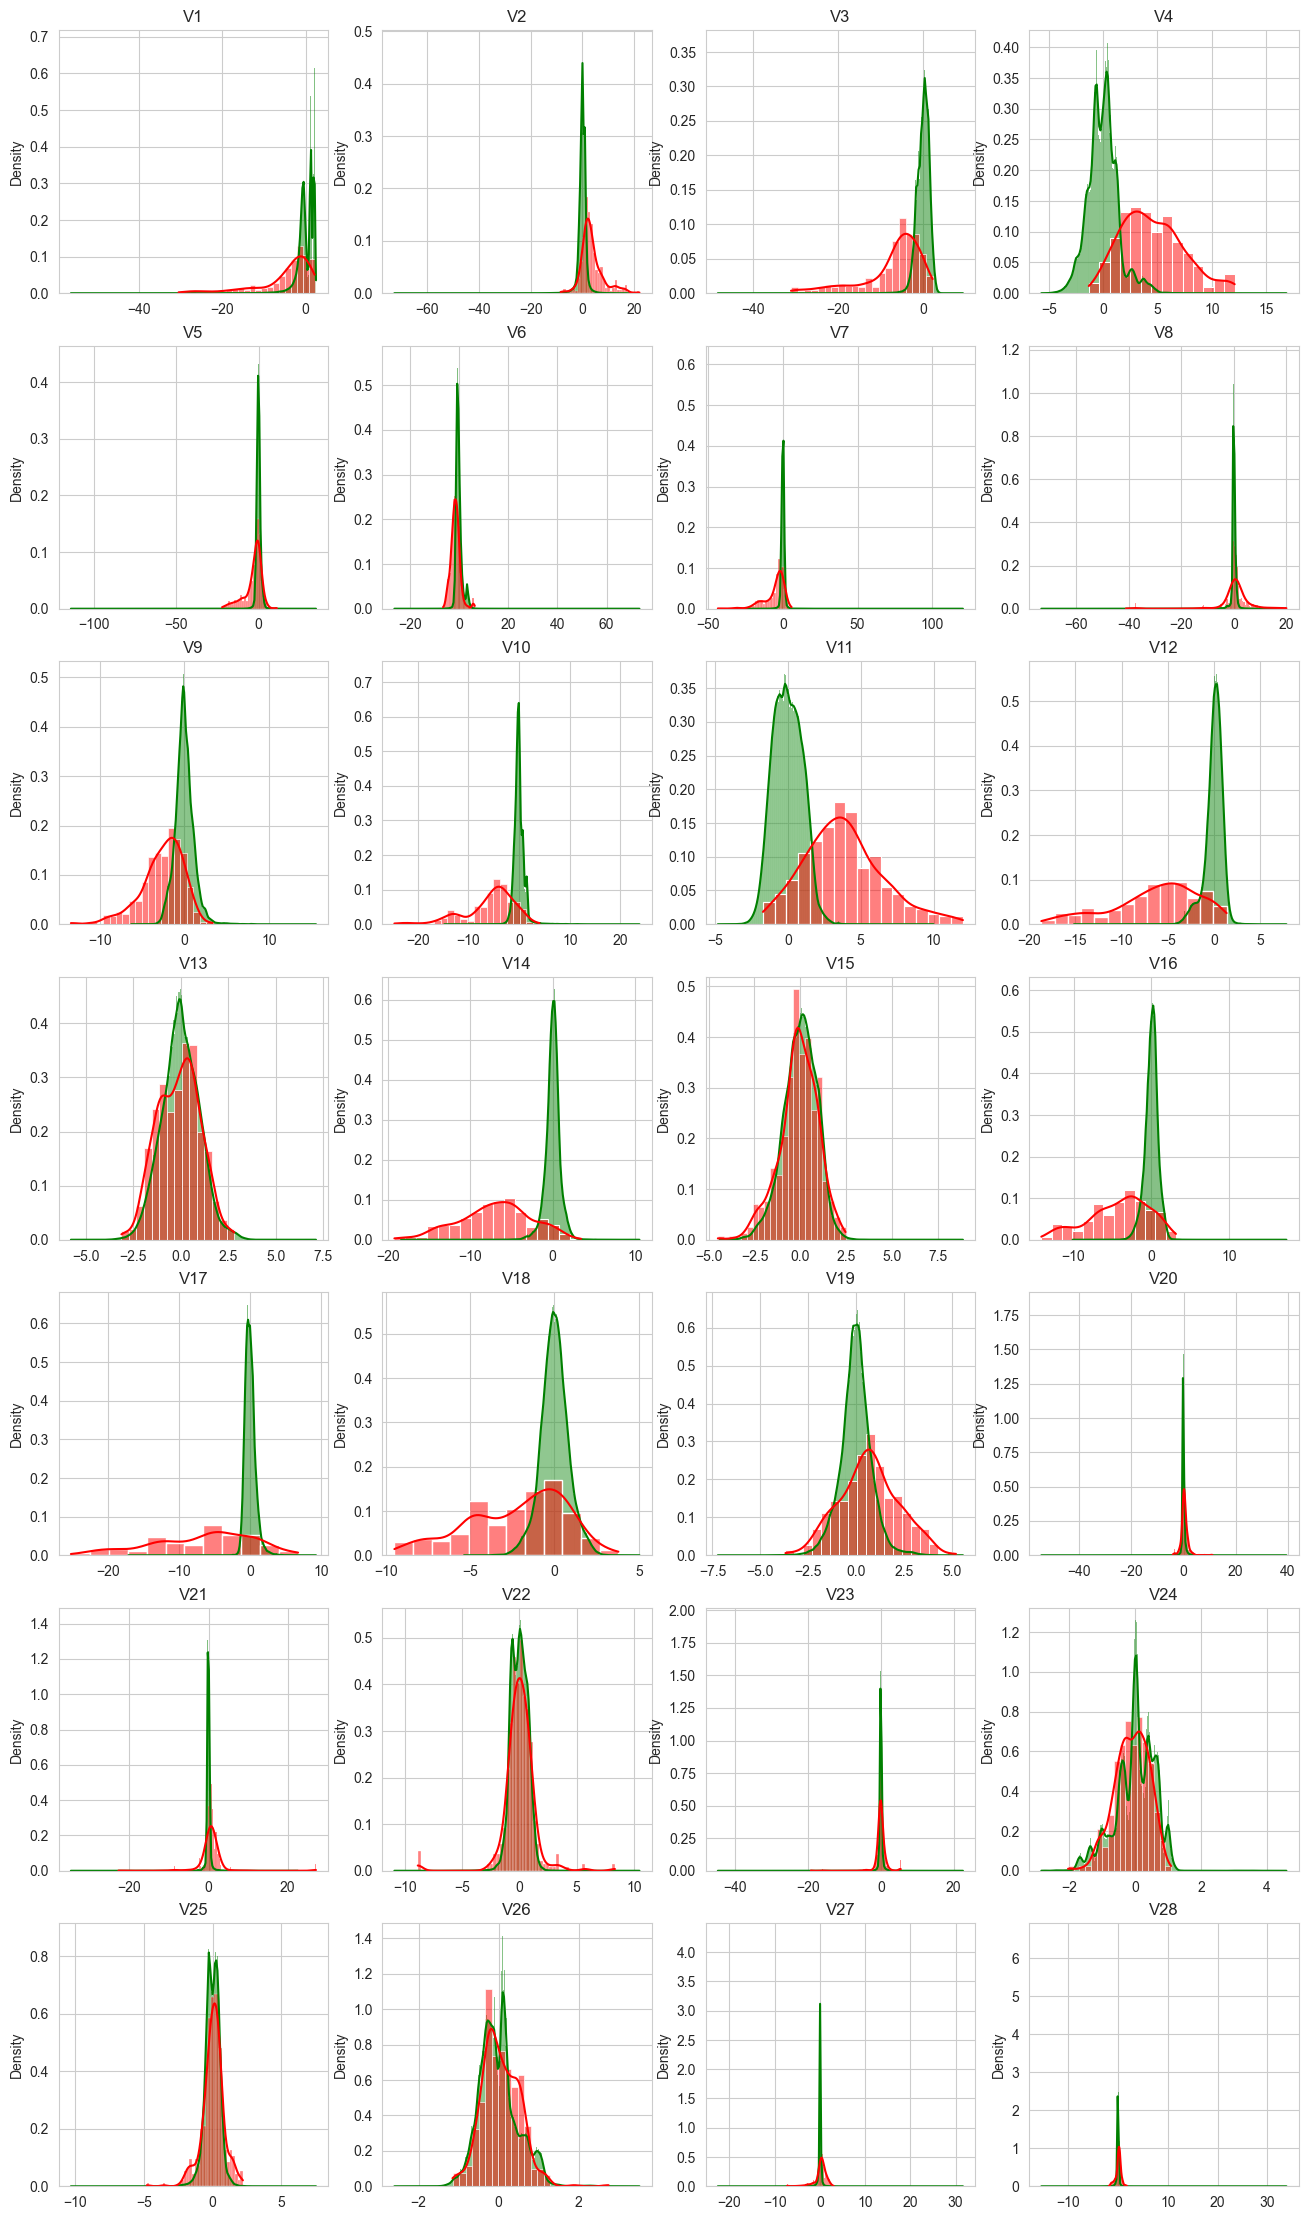

In [137]:
grid = gridspec.GridSpec(7, 4)
plt.figure(figsize=(16,28))
sns.histplot(data[data.Class==0]['Hour'], color='g', stat='density', kde=True)
for i, col in enumerate(data[data.iloc[:,1:29].columns]):
    ax = plt.subplot(grid[i])
    sns.histplot(data[data.Class==0][col], color='g', stat='density', kde=True)
    sns.histplot(data[data.Class==1][col], color='r', stat='density', kde=True)
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [144]:
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [147]:
data = data.drop(['Time','Hour'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [174]:
X, y = data.drop('Class', axis=1).values, data.Class.values
X_under, y_under = RandomUnderSampler(sampling_strategy='majority').fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, random_state=42, test_size=0.2)

In [191]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [195]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        99
           1       0.97      0.87      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197

0.91852195423624


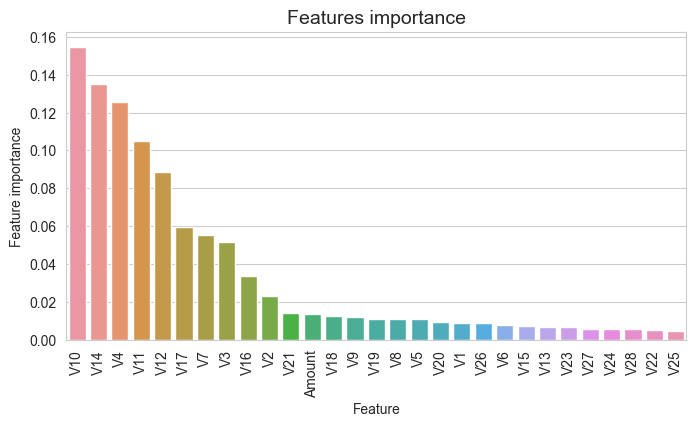

In [193]:
tmp = pd.DataFrame({'Feature': data.columns[:-1], 'Feature importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize = (8,4))
plt.title('Features importance',fontsize=14)
imp = sns.barplot(data=tmp, x='Feature', y='Feature importance')
imp.set_xticklabels(imp.get_xticklabels(),rotation=90)
plt.show()

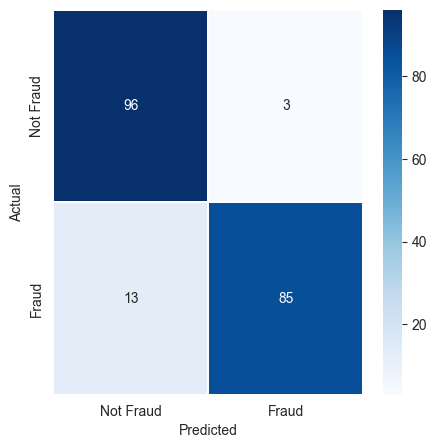

In [194]:
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax1 = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1, linewidths=.1, cmap="Blues")
plt.show()

In [211]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [218]:
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

C:\Users\trsgr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_16 (Conv1D)              │ (None, 28, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 28, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 27, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 27, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 27, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1728)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       110,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,361 (450.63 KB)

 Trainable params: 115,169 (449.88 KB)

 Non-trainable params: 192 (768.00 B)

In [219]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8103 - loss: 0.5138 - val_accuracy: 0.7056 - val_loss: 0.4297
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9391 - loss: 0.1732 - val_accuracy: 0.8782 - val_loss: 0.3662
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9349 - loss: 0.1634 - val_accuracy: 0.9391 - val_loss: 0.2856
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9552 - loss: 0.1267 - val_accuracy: 0.9391 - val_loss: 0.2831
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9433 - loss: 0.1409 - val_accuracy: 0.9340 - val_loss: 0.2109
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9415 - loss: 0.1527 - val_accuracy: 0.9391 - val_loss: 0.2218
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9569 - loss: 0.1267 - val_accuracy: 0.9289 - val_loss: 0.1848
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9450 - loss: 0.1376 - val_accuracy: 0.9340 - val_l

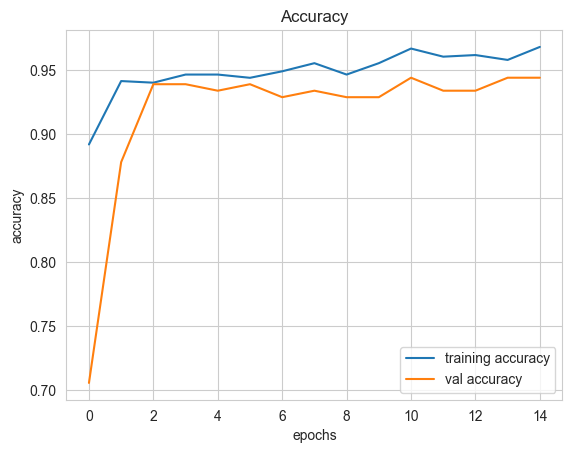

In [221]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

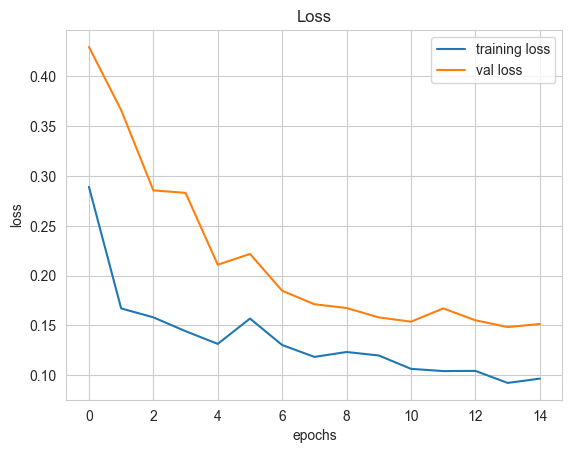

In [222]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()